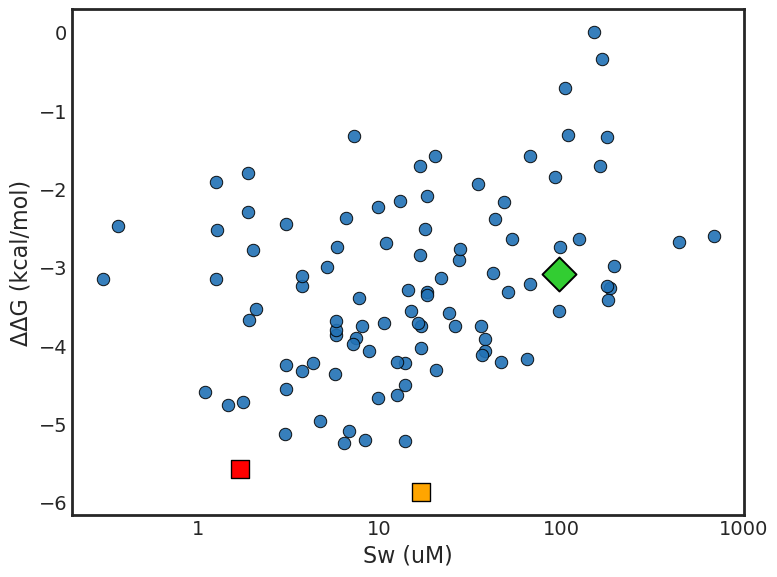

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem import PandasTools

sdf_path = "Step2_core4_Hpocket_NES_ADME.sdf"
df = PandasTools.LoadSDF(sdf_path)

df["r_user_S+Sw_uM"] = pd.to_numeric(df["r_user_S+Sw_uM"], errors="coerce")
df["r_user_DG(MLE)_cycle_BAR"] = pd.to_numeric(df["r_user_DG(MLE)_cycle_BAR"], errors="coerce")

df = df[df["r_user_S+Sw_uM"].notna() & df["r_user_DG(MLE)_cycle_BAR"].notna()]

plt.rcParams.update({'font.size': 14, 'font.family': 'serif'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x="r_user_S+Sw_uM",
    y="r_user_DG(MLE)_cycle_BAR",
    color="#2171b5",
    s=80,
    edgecolor="black",
    alpha=0.9,
    ax=ax
)

highlight_data = [
    ("22-1", "D", 300, "limegreen"),
    ("39107-1", "s", 150, "orange"),
    ("29608-2", "s", 150, "red")
]

for title_val, marker, size, color in highlight_data:
    df_highlight = df[df["ID"] == title_val]
    sns.scatterplot(
        data=df_highlight,
        x="r_user_S+Sw_uM",
        y="r_user_DG(MLE)_cycle_BAR",
        marker=marker,
        s=size,
        color=color,
        edgecolor="black",
        ax=ax,
        legend=False
    )

ax.set_xscale("log")
ax.set_xlabel("Sw (uM)", fontsize=16)
ax.set_ylabel("ΔΔG (kcal/mol)", fontsize=16)

ax.set_xticks([1, 10, 100, 1000])
ax.set_xticklabels(["1", "10", "100", "1000"])

ax.tick_params(axis='both', direction='in')
for spine in ax.spines.values():
    spine.set_linewidth(2.0)

plt.tight_layout()
plt.savefig("scatter_plot_ΔΔG_Sw.svg")
plt.show()


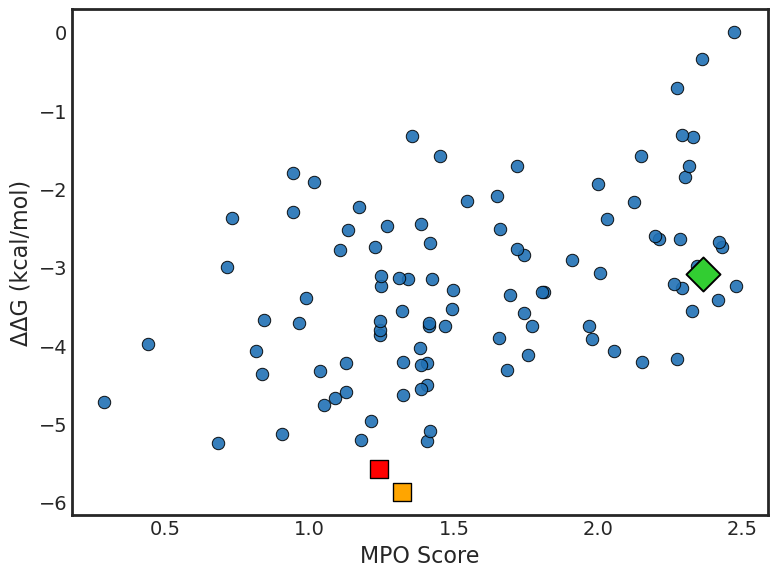

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem import PandasTools

sdf_path = "Step2_core4_Hpocket_NES_ADME.sdf"
df = PandasTools.LoadSDF(sdf_path)

df["r_user_MPO_Score"] = pd.to_numeric(df["r_user_MPO_Score"], errors="coerce")
df["r_user_DG(MLE)_cycle_BAR"] = pd.to_numeric(df["r_user_DG(MLE)_cycle_BAR"], errors="coerce")

df = df[df["r_user_MPO_Score"].notna() & df["r_user_DG(MLE)_cycle_BAR"].notna()]

plt.rcParams.update({'font.size': 14, 'font.family': 'serif'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x="r_user_MPO_Score",
    y="r_user_DG(MLE)_cycle_BAR",
    color="#2171b5",
    s=80,
    edgecolor="black",
    alpha=0.9,
    ax=ax
)

highlight_data = [
    ("22-1", "D", 300, "limegreen"),
    ("39107-1", "s", 150, "orange"),
    ("29608-2", "s", 150, "red")
]

for title_val, marker, size, color in highlight_data:
    df_highlight = df[df["ID"] == title_val]
    sns.scatterplot(
        data=df_highlight,
        x="r_user_MPO_Score",
        y="r_user_DG(MLE)_cycle_BAR",
        marker=marker,
        s=size,
        color=color,
        edgecolor="black",
        ax=ax,
        legend=False
    )

ax.set_xlabel("MPO Score", fontsize=16)
ax.set_ylabel("ΔΔG (kcal/mol)", fontsize=16)

ax.tick_params(axis='both', which='major', size=6, width=1.2, direction='in')
ax.tick_params(axis='both', which='minor', size=3, width=1.0, direction='in')

ax.tick_params(axis='both', direction='in')
for spine in ax.spines.values():
    spine.set_linewidth(2.0)

plt.tight_layout()
plt.savefig("scatter_plot_ΔΔG_MPOscore.svg")
plt.show()


In [3]:
import pandas as pd
from rdkit.Chem import PandasTools

sdf_path = "Step2_core4_Hpocket_NES_ADME.sdf"
df = PandasTools.LoadSDF(sdf_path)

df["r_user_DG(MLE)_cycle_BAR"] = pd.to_numeric(df["r_user_DG(MLE)_cycle_BAR"], errors="coerce")
df["r_i_glide_gscore"] = pd.to_numeric(df["r_i_glide_gscore"], errors="coerce")

excluded_title = "4-99"
target_titles = ["22-1", "39107-1", "29608-2"]

df_filtered = df[
    (df["ID"] != excluded_title) &
    df["r_user_DG(MLE)_cycle_BAR"].notna()
].copy()

df_filtered["rank_DG"] = df_filtered["r_user_DG(MLE)_cycle_BAR"].rank(method="min", ascending=True)

rank_df = df_filtered[df_filtered["ID"].isin(target_titles)][
    ["ID", "r_user_DG(MLE)_cycle_BAR", "rank_DG"]
]

print(rank_df)

         ID  r_user_DG(MLE)_cycle_BAR  rank_DG
0      22-1                     -3.09     60.0
1   39107-1                     -5.87      1.0
42  29608-2                     -5.58      2.0


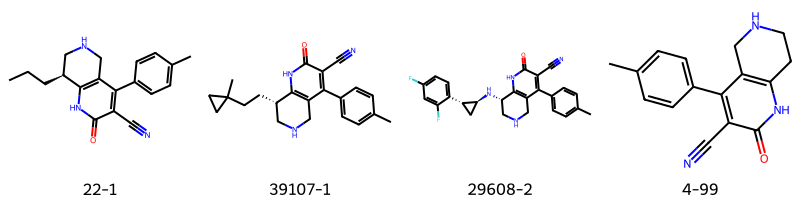

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw

target_ids = ["4-99", "22-1", "39107-1", "29608-2"]

subset = df[df["ID"].isin(target_ids)].copy()

subset["mol_from_smiles"] = subset["s_user_SMILES"].apply(Chem.MolFromSmiles)

Draw.MolsToImage(subset["mol_from_smiles"].tolist(), legends=subset["ID"].tolist(), molsPerRow=2)

In [5]:
import pandas as pd
from rdkit.Chem import PandasTools

# Load the SDF file
sdf_path = "Step2_core4_Hpocket_NES_ADME.sdf"
df = PandasTools.LoadSDF(sdf_path)

# Filter target compounds
target_ids = ["22-1", "39107-1", "29608-2"]
subset = df[df["ID"].isin(target_ids)].copy()

# Convert to numeric (if needed)
subset["r_user_S+logP"] = pd.to_numeric(subset["r_user_S+logP"], errors="coerce")
subset["r_user_S+Sw_uM"] = pd.to_numeric(subset["r_user_S+Sw_uM"], errors="coerce")
subset["r_user_MPO_score"] = pd.to_numeric(subset["r_user_MPO_Score"], errors="coerce")

# Select and print the relevant columns
print(subset[["ID", "r_user_S+logP", "r_user_S+Sw_uM", "r_user_MPO_Score"]])

         ID  r_user_S+logP  r_user_S+Sw_uM    r_user_MPO_Score
0      22-1       2.400705       96.941575    2.36420539693234
1   39107-1       3.501195       16.943095  1.3205611578883001
42  29608-2       3.343759        1.709077  1.2394104139754401


In [6]:
import pandas as pd
from rdkit.Chem import PandasTools

sdf_path = "Step2_core4_Hpocket_NES_ADME.sdf"
df = PandasTools.LoadSDF(sdf_path)

df["r_i_glide_gscore"] = pd.to_numeric(df["r_i_glide_gscore"], errors="coerce")

excluded_title = "4-99"
target_titles = ["22-1", "39107-1", "29608-2"]

df_filtered = df[
    (df["ID"] != excluded_title) &
    df["r_i_glide_gscore"].notna()
].copy()

df_filtered["rank_glide"] = df_filtered["r_i_glide_gscore"].rank(method="min", ascending=True)

rank_df = df_filtered[df_filtered["ID"].isin(target_titles)][
    ["ID", "r_i_glide_gscore", "rank_glide"]
]

print(rank_df)

         ID  r_i_glide_gscore  rank_glide
0      22-1          -8.87485       481.0
1   39107-1          -9.05371       305.0
42  29608-2          -8.85456       500.0


In [7]:
import pandas as pd
from rdkit.Chem import PandasTools

sdf_path = "Step2_core4_Hpocket_NES_ADME.sdf"
df = PandasTools.LoadSDF(sdf_path)

df["r_user_SBE"] = pd.to_numeric(df["r_user_SBE"], errors="coerce")

excluded_title = "4-99"
target_titles = ["22-1", "39107-1", "29608-2"]

df_filtered = df[
    (df["ID"] != excluded_title) &
    df["r_i_glide_gscore"].notna()
].copy()

df_filtered["rank_SBE"] = df_filtered["r_user_SBE"].rank(method="min", ascending=True)

rank_df = df_filtered[df_filtered["ID"].isin(target_titles)][
    ["ID", "r_user_SBE", "rank_SBE"]
]

print(rank_df)

         ID  r_user_SBE  rank_SBE
0      22-1   -1.030000       1.0
1   39107-1   -0.978333       2.0
42  29608-2   -0.465000      43.0
